In [1]:
import rasterio
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot
from pathlib import Path

In [2]:
from multispectral import corine
from multispectral import coords
from multispectral import windows
from lib import tools
tools.set_figure_width(15)

In [3]:
alltiles = list(Path('/home/usgs/landsat5/').glob('*.tif'))

In [4]:
alltiles[:5]

[PosixPath('/home/usgs/landsat5/LT05_L1TP_203032_20060728_20180310_01_T1.tif'),
 PosixPath('/home/usgs/landsat5/LT05_L1TP_181034_20060531_20161121_01_T1.tif'),
 PosixPath('/home/usgs/landsat5/LT05_L1TP_173034_20060912_20161118_01_T1.tif'),
 PosixPath('/home/usgs/landsat5/LT05_L1TP_198020_20060911_20161118_01_T1.tif'),
 PosixPath('/home/usgs/landsat5/LT05_L1TP_201030_20060714_20180309_01_T1.tif')]

In [6]:
wi = windows.prefilter(alltiles, corine.corine_filter)

In [7]:
wl = list(wi)

In [8]:
len(wl)

24798

In [ ]:
corine._tile_counts

In [10]:
windows.to_file(wl,'all_windows.csv')

In [3]:
wl = windows.from_file('all_windows.csv')

In [4]:
cdats = {}
for (ld,w) in wl:
    cdat = corine.fetch_corine(ld.crs)
    if cdat not in cdats:
        cdats[cdat] = []
    cdats[cdat].append((ld,w))

In [5]:
for cdat in cdats:
    print("{}: {}".format(cdat.name, len(cdats[cdat])))

/home/firewise/corine/corine_32629.tif: 685
/home/firewise/corine/corine_32635.tif: 4503
/home/firewise/corine/corine_32637.tif: 1147
/home/firewise/corine/corine_32632.tif: 3053
/home/firewise/corine/corine_32630.tif: 2186
/home/firewise/corine/corine_32633.tif: 4289
/home/firewise/corine/corine_32636.tif: 3026
/home/firewise/corine/corine_32631.tif: 105
/home/firewise/corine/corine_32634.tif: 5804


In [13]:
def show_window_list(wl,cdat):
    """Show the window list superimposed on the specified dataset (generally a corine tile)."""
    rs = [coords.geo_to_pixel(cdat, coords.pixel_to_geo(x,y)).flatten() for (x,y) in wl ]
    tools.showband(cdat,1,showrect=rs)

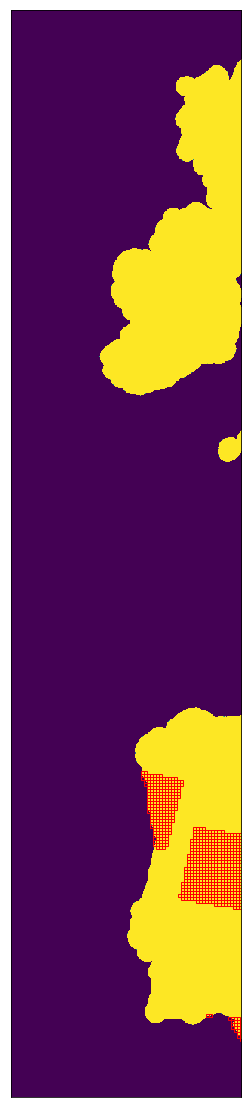

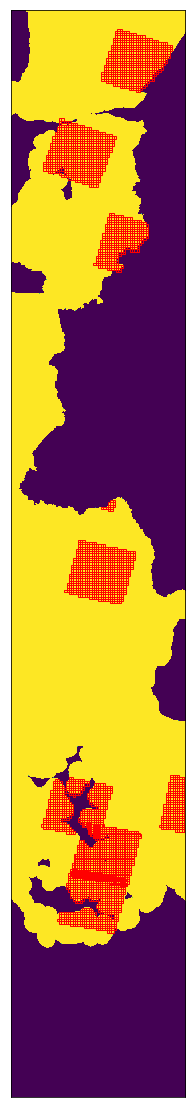

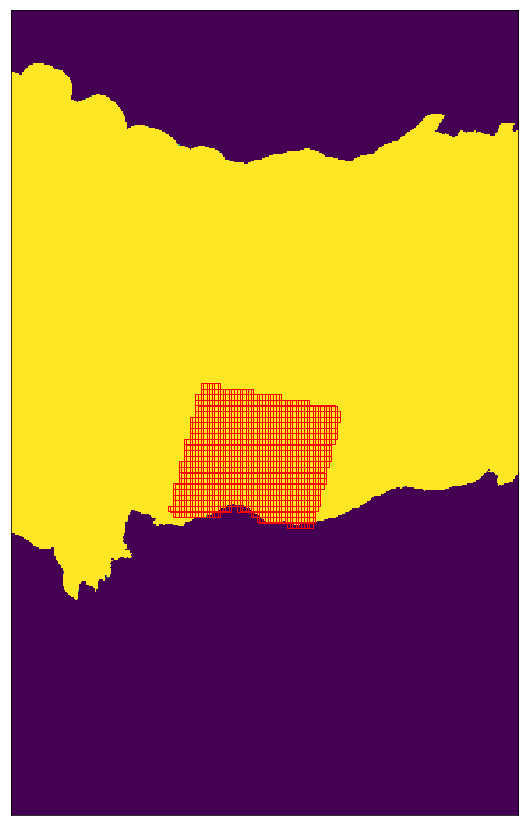

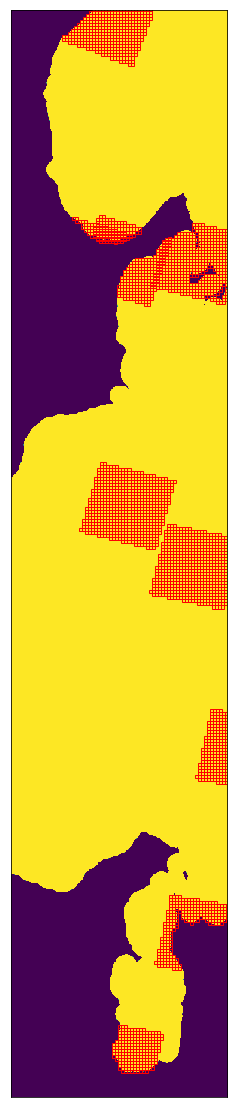

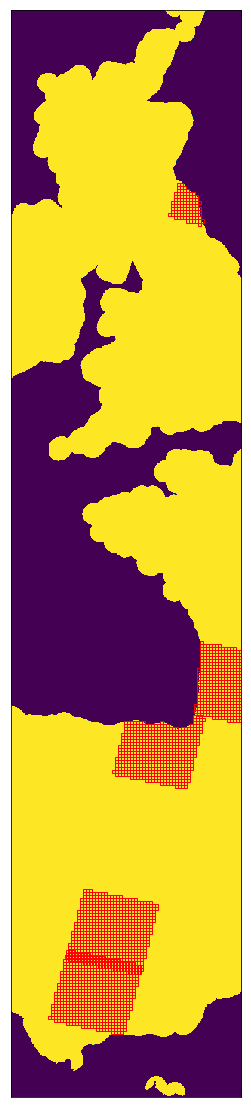

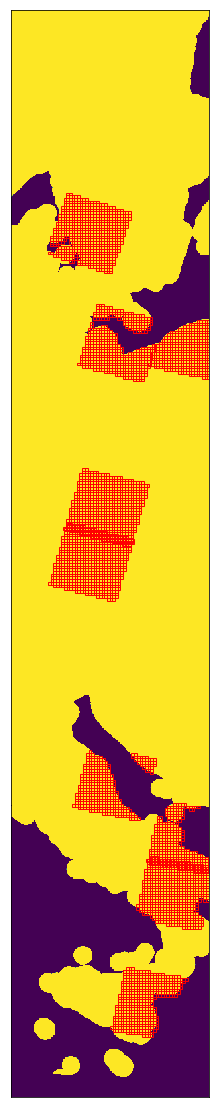

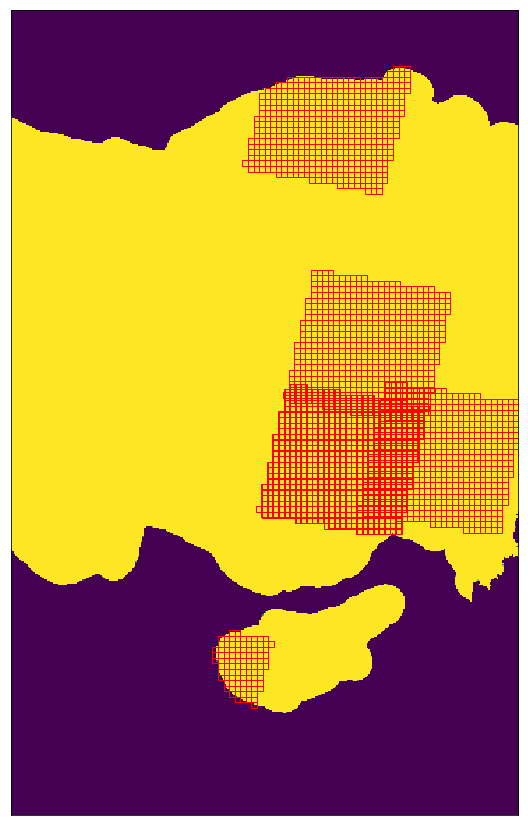

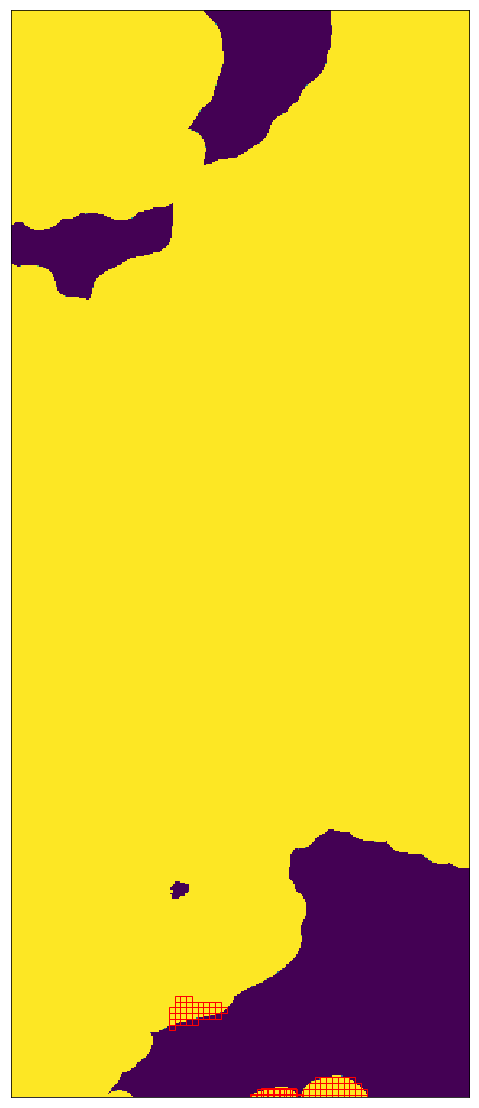

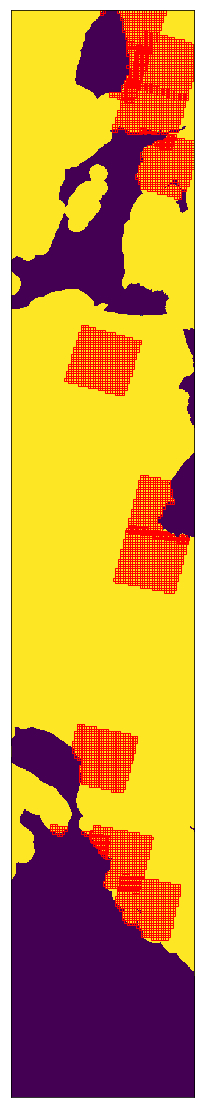

In [14]:
for cdat, wl in cdats.items():
    show_window_list( wl, cdat )